<!-- # Bim_Predict NoteBook -->

<!-- ## Importing Libraries -->

In [1]:
# Import libraries
import os
import pandas as pd

# Define project folder paths
# Data directories
BASE_DIR = "../../"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")
PREDICTED_DATA_DIR = os.path.join(DATA_DIR, "predicting_data")
TESTING_DATA_DIR = os.path.join(DATA_DIR, "testing_data")

# Model directories
MODELS_DIR = os.path.join(BASE_DIR, "models")
ML_MODELS_DIR = os.path.join(MODELS_DIR, "SK/machine_learning")
DL_MODELS_DIR = os.path.join(MODELS_DIR, "SK/deep_learning")
OTHER_MODELS_DIR = os.path.join(MODELS_DIR, "SK/other")

# Python modules and plots directories
PYTHON_MODULES_DIR = os.path.join(BASE_DIR, "python_modules")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

# List of directories to create
directories = [
    RAW_DATA_DIR, PROCESSED_DATA_DIR, PREDICTED_DATA_DIR,
    MODELS_DIR, ML_MODELS_DIR, DL_MODELS_DIR, OTHER_MODELS_DIR,
    PYTHON_MODULES_DIR, PLOTS_DIR
]

# Create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    else:
        print(f"Directory already exists: {directory}")

Directory already exists: ../../data/raw_data
Directory already exists: ../../data/processed_data
Directory already exists: ../../data/predicting_data
Directory already exists: ../../models
Directory already exists: ../../models/SK/machine_learning
Directory already exists: ../../models/SK/deep_learning
Directory already exists: ../../models/SK/other
Directory already exists: ../../python_modules
Directory already exists: ../../plots


### Paths Creating && Data Importing

In [2]:
import os
import pandas as pd

# List all Excel files in RAW_DATA_DIR
excel_files = [f for f in os.listdir(RAW_DATA_DIR) if f.endswith(".xlsx") or f.endswith(".xls")]

# Dictionary to store DataFrames for each file and sheet
dataframes = {}

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(RAW_DATA_DIR, file)
    print(f"Loading: {file_path}")

    try:
        # Load Excel file
        excel_data = pd.ExcelFile(file_path)

        # Load all sheets dynamically
        for sheet_name in excel_data.sheet_names:
            df = excel_data.parse(sheet_name)

            # Save DataFrame with a unique identifier
            dataframes[f"{file}_{sheet_name}"] = df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Display summary of loaded data
print(f"\nTotal files processed: {len(dataframes)}")
for key, df in dataframes.items():
    print(f"Loaded DataFrame: {key}, Shape: {df.shape}")

Loading: ../../data/raw_data/maquette_23017.xlsx
Loading: ../../data/raw_data/maquette_23016.xlsx
Loading: ../../data/raw_data/maquette_23002.xlsx
Loading: ../../data/raw_data/maquette_23007.xlsx
Loading: ../../data/raw_data/RawData-Cibles.xlsx
Loading: ../../data/raw_data/maquette_23001.xlsx

Total files processed: 23
Loaded DataFrame: maquette_23017.xlsx_Murs, Shape: (215, 149)
Loaded DataFrame: maquette_23017.xlsx_Sols, Shape: (29, 140)
Loaded DataFrame: maquette_23017.xlsx_Poutres, Shape: (152, 136)
Loaded DataFrame: maquette_23017.xlsx_Poteaux, Shape: (72, 111)
Loaded DataFrame: maquette_23016.xlsx_Murs, Shape: (1589, 146)
Loaded DataFrame: maquette_23016.xlsx_Sols, Shape: (45, 142)
Loaded DataFrame: maquette_23016.xlsx_Poutres, Shape: (778, 136)
Loaded DataFrame: maquette_23016.xlsx_Poteaux, Shape: (215, 110)
Loaded DataFrame: maquette_23002.xlsx_Murs, Shape: (345, 94)
Loaded DataFrame: maquette_23002.xlsx_Sols, Shape: (32, 91)
Loaded DataFrame: maquette_23002.xlsx_Poutres, Shape

### Data Cleaning && PreProcessing

<!-- ## PreProcessing Data -->

In [3]:
# # Define required columns dynamically
# required_columns = {
#     "Murs": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Hauteur",
#              "Epaisseur", "AI", "AS", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
#              "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol au-dessous", "Fenêtres", "Portes",
#              "Ouvertures", "Murs imbriqués", "Mur multicouche", "Mur empilé", "Profil modifié", "Extension inférieure",
#              "Extension supérieure", "Partie inférieure attachée", "Partie supérieure attachée", "Décalage supérieur",
#              "Décalage inférieur", "Matériau structurel"],

#     "Sols": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Murs en intersection",
#              "Murs coupés (u)", "Murs coupés (Ids)", "Murs coupants (u)", "Murs coupants (Ids)", "Poutres en intersection",
#              "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
#              "Poteaux en intersection", "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)",
#              "Poteaux coupants (Ids)", "Ouvertures", "Sol multicouche", "Profil modifié", "Décalage par rapport au niveau",
#              "Epaisseur", "Lié au volume", "Etude de l'élévation à la base", "Etude de l'élévation en haut",
#              "Epaisseur du porteur", "Elévation au niveau du noyau inférieur", "Elévation au niveau du noyau supérieur",
#              "Elévation en haut", "Elévation à la base", "Matériau structurel"],

#     "Poutres": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
#                 "Hauteur totale", "Hauteur", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
#                 "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol au-dessous", "Poteaux en intersection",
#                 "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)", "Poteaux coupants (Ids)",
#                 "Etat de la jonction", "Valeur de décalage Z", "Justification Z", "Valeur de décalage Y", "Justification Y",
#                 "Justification YZ", "Matériau structurel", "Elévation du niveau de référence", "Elévation en haut",
#                 "Rotation de la section", "Orientation", "Décalage du niveau d'arrivée", "Décalage du niveau de départ",
#                 "Elévation à la base", "Longueur de coupe", "Longueur", "hauteur_section", "largeur_section"],

#     "Poteaux": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
#                 "Hauteur", "Longueur", "Partie inférieure attachée", "Partie supérieure attachée", "Sols en intersection",
#                 "Sols coupés (u)", "Sols coupés (Ids)", "Sols coupants (u)", "Sols coupants (Ids)", "Poutres en intersection",
#                 "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
#                 "Matériau structurel", "Décalage supérieur", "Décalage inférieur", "Diamètre poteau", "h", "b",
#                 "hauteur_section", "largeur_section"]
# }

# # Initialize a dictionary to store filtered dataframes
# cleaned_dataframes = {}

# for df_name, df in dataframes.items():
#     print(f"\n🟢 Original shape of {df_name}: {df.shape}")

#     # Automatically detect the correct category for filtering
#     for category, columns in required_columns.items():
#         if category.lower() in df_name.lower():  # Match dynamically
#             try:
#                 filtered_df = df[columns]  # Keep only the required columns
#             except KeyError as e:
#                 missing_columns = set(columns) - set(df.columns)
#                 print(f"⚠️ Missing columns in {df_name}: {missing_columns}. Skipping this dataframe.")
#                 continue
#             cleaned_dataframes[df_name] = filtered_df
#             print(f"✅ Shape after filtering {df_name}: {filtered_df.shape}")
#             break  # Stop looping once the correct match is found
#     else:
#         print(f"⚠️ No matching category for {df_name}, skipping filtering.")

In [4]:
# print("\n📊 Cleaned DataFrames:")
# for df_name, df in cleaned_dataframes.items():
#     print(f" - {df_name}: {df.shape}")


## Deep Learning

In [5]:
TARGET_COLUMNS = ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']


In [ ]:
print(f"Available columns in dataset: {list(df.columns)}")
print(f"TARGET_COLUMNS: {TARGET_COLUMNS}")

existing_target_columns = [col for col in df.columns if col.strip().lower() in [t.lower() for t in TARGET_COLUMNS]]
print(f"Unique values in target column: {df[existing_target_columns[0]].nunique()}" if existing_target_columns else "No target column found.")


## Save the cleaned DataFrames to the processed data directory
for name, df in dataframes.items():
    # Define the output file path
    output_file = os.path.join(PROCESSED_DATA_DIR, f"{name}.csv")

    # Save DataFrame to CSV
    df.to_csv(output_file, index=False)
    print(f"Saved cleaned DataFrame: {output_file}")
# Display the final list of processed files
print("\nFinal list of processed files:")

Available columns in dataset: ['Id', '011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Nom', 'AI', 'AS', 'Hauteur', 'Longueur', 'Partie inférieure attachée', 'Partie supérieure attachée', 'Sols en intersection', 'Sols coupés (u)', 'Sols coupés (Ids)', 'Sols coupants (u)', 'Sols coupants (Ids)', 'Poutres en intersection', 'Poutres coupés (u)', 'Poutres coupés (Ids)', 'Poutres coupants (u)', 'Poutres coupants (Ids)', 'Image', 'Style de poteau', 'Catégorie', "Type prédéfini d'IFC", 'Exporter au format IFC sous', 'Exporter au format IFC', 'IfcGUID', 'A une association', "Enrobage d'armature - Face inférieure", "Enrobage d'armature - Face supérieure", "Enrobage d'armature - Autres faces", 'Variantes', 'Volume', 'Phase de démolition', 'Phase de création', 'Commentaires', 'Matériau structurel', "Marque d'emplacement du poteau", 'ID hôte', 'Décalage supérieur', 'Décalage inférieur', 'Niveau supérieur', 'Niveau de base', 'Niveau', 'Famille et type', 'Famille', 'Type

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize encoder dictionaries
feature_encoders = {}
target_encoders = {}

USE_ONE_HOT = False

def encode_columns(df, df_name, columns, encoder_dict, encoder_type=LabelEncoder):
    """Utility function to encode columns and store encoders."""
    for col in columns:
        encoder = encoder_type()
        df[col] = encoder.fit_transform(df[col].astype(str))
        encoder_dict[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored {encoder_type.__name__} for {df_name} - {col}")

for df_name, df in dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    # Identify categorical columns and split into target/features
    categorical_cols = df.select_dtypes(include="object").columns.tolist()
    target_cols = [col for col in categorical_cols if col in TARGET_COLUMNS]
    feature_cols = [col for col in categorical_cols if col not in TARGET_COLUMNS]

    # Encode target columns
    encode_columns(df, df_name, target_cols, target_encoders)

    # Encode feature columns (LabelEncoder by default)
    encode_columns(df, df_name, feature_cols, feature_encoders)

    # Optionally apply One-Hot Encoding to features
    if USE_ONE_HOT and feature_cols:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
        encoded_values = encoder.fit_transform(df[feature_cols])
        encoded_df = pd.DataFrame(
            encoded_values,
            index=df.index,
            columns=encoder.get_feature_names_out(feature_cols)
        )
        df.drop(columns=feature_cols, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)
        print(f"✅ Applied One-Hot Encoding for columns: {feature_cols}")

    # Save the updated DataFrame back
    dataframes[df_name] = df
    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")



🔄 Encoding categorical features for maquette_23017.xlsx_Murs...
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - 011EC_Lot
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - 012EC_Ouvrage
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - 013EC_Localisation
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - 014EC_Mode Constructif
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Nom
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Sols coupants (Ids)
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Image
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Catégorie
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - IfcGUID
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Phase de démolition
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Phase de création
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Commentaires
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Famille et type
✅ Stored LabelEncoder for maquette_23017.xlsx_Murs - Famille
✅ St


🔄 Processing dataframe: maquette_23017.xlsx_Murs
🎯 Training model for target column: 011EC_Lot
⚠️ Only one class found for 011EC_Lot in maquette_23017.xlsx_Murs. Skipping...
🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/50
6/6 [==============================] - 1s 57ms/step - loss: 0.5805 - accuracy: 0.7267 - val_loss: 0.3705 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.3708 - accuracy: 0.8895 - val_loss: 0.2297 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2357 - accuracy: 0.9419 - val_loss: 0.1515 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1627 - accuracy: 0.9651 - val_loss: 0.1031 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1280 - accuracy: 0.9767 - val_loss: 0.0746 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/50
6/6 

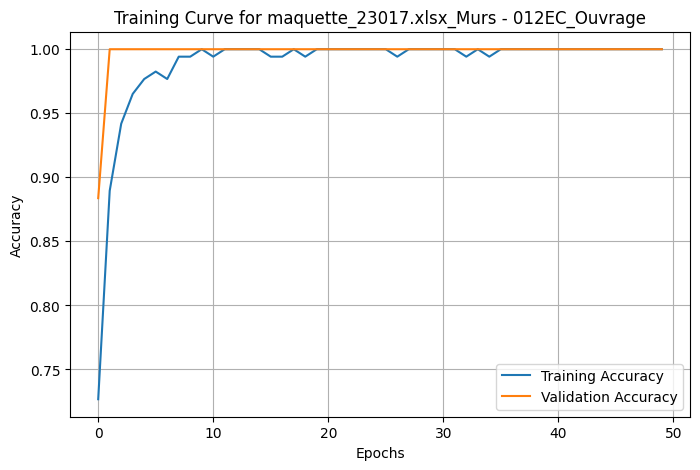

🎯 Training model for target column: 013EC_Localisation
Epoch 1/50
6/6 [==============================] - 1s 54ms/step - loss: 1.3087 - accuracy: 0.3721 - val_loss: 1.1101 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 1.1068 - accuracy: 0.5698 - val_loss: 0.9308 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.9336 - accuracy: 0.6570 - val_loss: 0.7995 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.8054 - accuracy: 0.7384 - val_loss: 0.7104 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.6841 - accuracy: 0.7733 - val_loss: 0.6463 - val_accuracy: 0.7209 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6338 - accuracy: 0.7907 - val_loss: 0.6011 - val_accuracy: 0.7209 - lr: 0.0010
Epoch 7/50
6/6 [=================

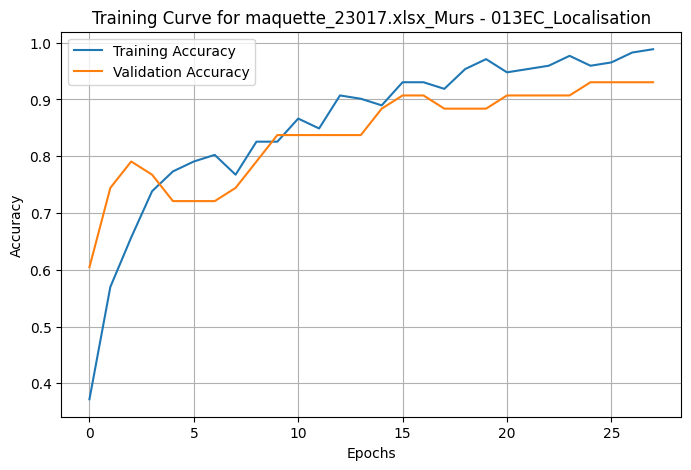

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/50
6/6 [==============================] - 1s 50ms/step - loss: 1.2067 - accuracy: 0.3488 - val_loss: 0.7563 - val_accuracy: 0.8605 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.8569 - accuracy: 0.6453 - val_loss: 0.5220 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6246 - accuracy: 0.7907 - val_loss: 0.3697 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.4433 - accuracy: 0.9128 - val_loss: 0.2683 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3430 - accuracy: 0.9128 - val_loss: 0.1932 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.2677 - accuracy: 0.9477 - val_loss: 0.1370 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/50
6/6 [=============

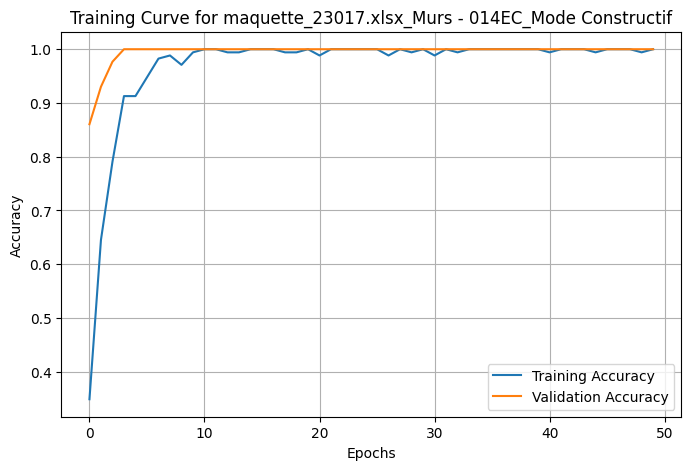


🔄 Processing dataframe: maquette_23017.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
⚠️ Only one class found for 011EC_Lot in maquette_23017.xlsx_Sols. Skipping...
🎯 Training model for target column: 012EC_Ouvrage


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Callbacks to prevent overfitting
def get_callbacks(patience=5):
    return [
        keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.5, patience=patience // 2, verbose=1
        )
    ]

# Build model (make this reusable)
def build_model(input_dim, output_dim, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(output_dim, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Plot training curve (make this reusable too)
def plot_training_curve(history, df_name, target_col):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training Curve for {df_name} - {target_col}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main loop
for df_name, df in dataframes.items():
    print(f"\n🔄 Processing dataframe: {df_name}")

    missing_targets = set(TARGET_COLUMNS) - set(df.columns)
    if missing_targets:
        print(f"⚠️ Missing target columns in {df_name}: {missing_targets}. Skipping...")
        continue

    X = df.drop(columns=TARGET_COLUMNS).fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for target_col in TARGET_COLUMNS:
        print(f"🎯 Training model for target column: {target_col}")

        y = df[target_col].fillna(0)

        # Check if we have enough samples and classes for meaningful training
        if len(y) < 10:
            print(f"⚠️ Insufficient data for {target_col} in {df_name} (only {len(y)} samples). Skipping...")
            continue

        if y.nunique() < 2:
            print(f"⚠️ Only one class found for {target_col} in {df_name}. Skipping...")
            continue

        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42,
            stratify=y if y.nunique() > 1 else None
        )

        num_features = X_train.shape[1]
        num_classes = len(np.unique(y_train))

        # Clip target values to valid range
        y_train = y_train.clip(0, num_classes - 1)
        y_test = y_test.clip(0, num_classes - 1)

        # Build and train model
        model = build_model(num_features, num_classes)
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=50,
            batch_size=32,
            callbacks=get_callbacks(),
            verbose=1
        )

        # Plot training curve
        plot_training_curve(history, df_name, target_col)


In [ ]:
# Imports
import pandas as pd
import numpy as np
import os
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def build_model(input_dim, num_classes, arch="DNN"):
    """Builds a neural network model."""
    architectures = {
        "DNN": [
            keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.4),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),
        ],
        "Wide_Deep": [
            keras.layers.Dense(256, activation='relu', input_shape=(input_dim,)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.4),
        ]
    }
    layers = architectures.get(arch, architectures["DNN"])
    layers.append(keras.layers.Dense(num_classes, activation='softmax'))
    return keras.Sequential(layers)

def get_callbacks(patience=5):
    """Generates EarlyStopping and ReduceLROnPlateau callbacks."""
    return [
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=patience // 2, verbose=0)
    ]

def train_and_evaluate(models, X_train, y_train, X_test, y_test, dataset_name, epochs=50, batch_size=32):
    """Trains and evaluates given models."""
    results = {}
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            callbacks=get_callbacks(),
            verbose=0
        )
        val_acc = max(history.history['val_accuracy'])
        results[name] = val_acc
        plt.plot(history.history['val_accuracy'], label=f"{name} ({val_acc:.4f})")

    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title(f"Model Comparison - {dataset_name}")
    plt.legend(loc="best")
    plt.grid()

    os.makedirs('plots', exist_ok=True)
    plt.savefig(f'plots/{dataset_name}_learning_curves.png')
    plt.close()

    return results

# Main Processing Pipeline
def process_dataset(df, dataset_name, target_col, target_encoders, dl_models_dir):
    """Processes a single dataset: encodes, splits, scales, trains models."""
    print(f"\n🔄 Processing dataset: {dataset_name}")

    # Prepare features and target
    feature_columns = [col for col in df.columns if col not in ['Id', target_col]]
    X = df[feature_columns].fillna(0)
    X, feature_encoders = feature_encoders(X)

    y, target_encoder = target_encoders[f"{dataset_name}_{target_col}"]
    target_encoders[f"{dataset_name}_{target_col}"] = target_encoder

    # Split data
    stratify_option = y if pd.Series(y).value_counts().min() > 1 else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=stratify_option
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    deep_models = {
        "DNN": build_model(X_train_scaled.shape[1], len(np.unique(y_train)), "DNN"),
        "Wide_Deep": build_model(X_train_scaled.shape[1], len(np.unique(y_train)), "Wide_Deep")
    }

    # Train and evaluate
    model_results = train_and_evaluate(
        deep_models, X_train_scaled, y_train, X_test_scaled, y_test, dataset_name
    )

    # Save the best model
    best_model_name = max(model_results, key=model_results.get)
    best_model = deep_models[best_model_name]
    os.makedirs(dl_models_dir, exist_ok=True)
    model_save_path = os.path.join(dl_models_dir, f"{dataset_name}_best_model.keras")
    best_model.save(model_save_path)

    print(f"🏆 Best model for {dataset_name}: {best_model_name} "
          f"with accuracy {model_results[best_model_name]:.4f}")

    return model_results

# Main execution
if "train_test_data" not in globals():
    target_encoders = {}
    DL_MODELS_DIR = 'saved_models'

    for dataset_name, df in dataframes.items():
        target_col = TARGET_COLUMNS[0] if isinstance(TARGET_COLUMNS, list) else TARGET_COLUMNS
        process_dataset(df, dataset_name, target_col, target_encoders, DL_MODELS_DIR)
else:
    print("Train-test data already exists.")



🔄 Processing dataset: maquette_23017.xlsx_Murs
🏆 Best model for maquette_23017.xlsx_Murs: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23017.xlsx_Sols
🏆 Best model for maquette_23017.xlsx_Sols: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23017.xlsx_Poutres
🏆 Best model for maquette_23017.xlsx_Poutres: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23017.xlsx_Poteaux
🏆 Best model for maquette_23017.xlsx_Poteaux: DNN with accuracy 1.0000

🔄 Processing dataset: maquette_23016.xlsx_Murs
🏆 Best model for maquette_23016.xlsx_Murs: DNN with accuracy 1.0000

🔄 Processing dataset: maquette_23016.xlsx_Sols
🏆 Best model for maquette_23016.xlsx_Sols: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23016.xlsx_Poutres
🏆 Best model for maquette_23016.xlsx_Poutres: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23016.xlsx_Poteaux
🏆 Best model for maquette_23016.xlsx_Poteaux: DNN with accuracy 0.0000

🔄 Processing dataset: maquette_23002.xlsx_Murs


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras_tuner import BayesianOptimization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing pipeline
def preprocess_data(X_train, X_test):
    # Check if inputs are numpy arrays and convert to DataFrame if needed
    if isinstance(X_train, np.ndarray):
        # If already preprocessed arrays, just return them with a dummy preprocessor
        return X_train, X_test, None

    numeric_features = X_train.select_dtypes(exclude=["object"]).columns.tolist()
    categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, preprocessor

# Build model dynamically
def build_model(hp):
    num_units_1 = hp.Int('units_1', 32, 256, step=32)
    num_units_2 = hp.Int('units_2', 16, 128, step=16)
    dropout_1 = hp.Float('dropout_1', 0.1, 0.5, step=0.05)
    dropout_2 = hp.Float('dropout_2', 0.1, 0.5, step=0.05)
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model = keras.Sequential([
        keras.layers.Dense(num_units_1, activation='relu', input_shape=(input_dim,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_1),
        keras.layers.Dense(num_units_2, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_2),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Callbacks for better tuning stability
def get_callbacks(patience=5):
    return [
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=patience // 2, verbose=0)
    ]

# Hyperparameter tuning
def tune_hyperparameters(X_train, y_train, X_val, y_val):
    tuner = BayesianOptimization(
        build_model,
        objective="val_accuracy",
        max_trials=50,
        directory="hyperparameter_tuning",
        project_name="deep_learning_tuning"
    )

    tuner.search(
        X_train, y_train,
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks=get_callbacks(),
        verbose=0
    )

    best_model = tuner.get_best_models(num_models=1)[0]
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    return best_model, best_hps

# Train and save the best model
def train_and_save_best_model(best_model, X_train, y_train, X_test, y_test, DL_MODELS_DIR):
    history = best_model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=get_callbacks(),
        verbose=0
    )

    best_model.save(os.path.join(DL_MODELS_DIR, 'best_model_tuned.keras'))

    # Plot learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Deep Learning Training Curve')
# Main execution
DL_MODELS_DIR = 'models/deep_learning'
os.makedirs(DL_MODELS_DIR, exist_ok=True)

# Add missing import
import numpy as np

# Example: X_train, X_test, y_train, y_test must be defined already
X_train_processed, X_test_processed, preprocessor = preprocess_data(X_train, X_test)

input_dim = X_train_processed.shape[1]
num_classes = len(pd.Series(y_train).unique())

# Ensure labels are integers from 0 to num_classes-1

input_dim = X_train_processed.shape[1]
num_classes = len(pd.Series(y_train).unique())

# Ensure labels are integers from 0 to num_clas_
